Given a signal waveform,

$x(t) = 3.25sin(2\pi50t) + 1.25cos(2\pi (100t + \pi/4))$

sample it at 8,000 samples per second and

a. write a program to quantize $x(t)$ using a 6-bit bipolar quantizer to obtain the quantized signal $x_q$, assuming that the signal range is from -5 to 5 volts;

b. plot the original signal and quantized signal;

c. calculate the SNR due to quantization using the program.

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# Signal Parameters
f1 = 50
f2 = 100
fs = 8000
Ts = 1/fs
t_start = 0
t_end = 0.04
t = np.arange(t_start, t_end, Ts)

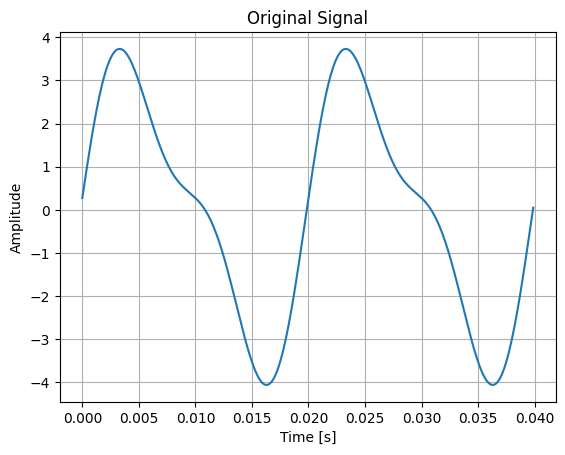

In [51]:
x = (3.25 * np.sin(2 * np.pi * 50 * t)) + (1.25 * np.cos(2 * np.pi * ((f2 * t) + (np.pi / 4))))
plt.plot(t, x)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [52]:
# a.

min_val = -5
max_val = 5
length = max_val - min_val

n_bits = 6
q_levels = 2 ** n_bits
step_size = length / q_levels

q_index = np.floor((x - np.min(x)) / step_size)

clipped_index = np.clip(q_index, 0, q_levels - 1)

q_value =  np.min(x) + ((clipped_index + 0.5) * step_size)

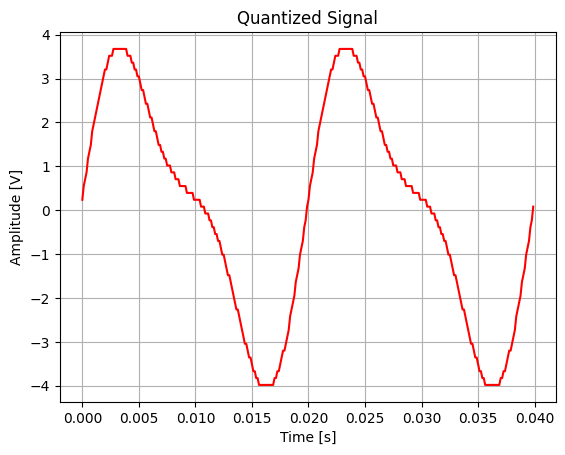

In [53]:
# b.

plt.plot(t, q_value, 'r')
#plt.plot(t, x)
plt.title('Quantized Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [V]')
plt.grid()
plt.show()

In [54]:
# c.

q_err = x - q_value    # Quantization Error

p_qerr = (step_size**2) / 12       # Power of quantization error
p_signal = np.mean(x**2)           # Power of signal

SNR = (p_signal) / (p_qerr)        # Signal-to-Noise Ratio
print(SNR)      

2979.84
